In [1]:
###############
### Imports ###
###############

import numpy as np
from functions import *
import pandas as pd
import matplotlib.pyplot as plt
import random
from IPython.display import clear_output

In [2]:
amount = 1500
size = 1000
squares = []
triangles = []
square_areas = []
triangle_areas = []
training = []
weights = np.zeros(size**2)

while len(training) < amount:
    shape_tri, base_tri, height_tri, start_point_tri = generate_triangle(size)
    shape_sq, base_sq, height_sq, start_point_sq = generate_square(size)
    training.append((shape_sq,-1))
    training.append((shape_tri,1))
    square_areas.append(np.sum(shape_sq))
    triangle_areas.append(np.sum(shape_tri))
    amount += 1

print(f'Average square area: {np.mean(square_areas)}, Average triangle area: {np.mean(triangle_areas)}, Ratio: {np.mean(triangle_areas)/np.mean(square_areas)}')

Average square area: 143122.45333333334, Average triangle area: 136299.49133333334, Ratio: 0.9523278015357293


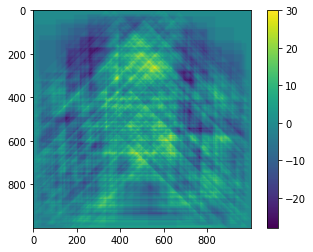

In [4]:
while training:
    i = np.random.randint(0,len(training))
    set = training[i]
    train = set[0].flatten()
    label = set[1]
    res = weights @ train
    if res > 0:
        res = 1
    elif res < 0:
        res = -1
    
    if res != label:
        err = label - res
        weights += err*train

    clear_output(wait=True)
    plt.imshow(weights.reshape((size,size)))
    plt.colorbar()
    plt.show()

    del training[i]